<a href="https://colab.research.google.com/github/vasudevan-gomathy/Ecommerce-Data-Analysis/blob/main/Cointab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Importing necessary library and data**

In [ ]:
# Importing necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing datasets using PANDAS

order_report = pd.read_excel('/content/Company X - Order Report.xlsx')
SKU = pd.read_excel('/content/Company X - SKU Master.xlsx')
invoice = pd.read_excel("/content/Courier Company - Invoice.xlsx")
pincode = pd.read_excel("/content/Company X - Pincode Zones.xlsx")
rates = pd.read_excel('/content/Courier Company - Rates.xlsx')

# **2) Computing Net weight per Order ID**

In [ ]:
# Merging Order Report and SKU master

pd1 = order_report.merge(SKU, how = 'left')
pd1

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350
...,...,...,...,...
396,2001806229,8904223818942,1.0,133
397,2001806229,8904223818850,1.0,240
398,2001806226,8904223818850,2.0,240
399,2001806210,8904223816214,1.0,120


In [ ]:
# Computing Net Weight

pd1["Net_Weight"] = pd1['Order Qty'] * pd1['Weight (g)']
pd1.head(10)

,ExternOrderNo,SKU,Order Qty,Weight (g),Net_Weight
0,2001827036,8904223818706,1.0,127,127.0
1,2001827036,8904223819093,1.0,150,150.0
2,2001827036,8904223819109,1.0,100,100.0
3,2001827036,8904223818430,1.0,165,165.0
4,2001827036,8904223819277,1.0,350,350.0
5,2001827036,GIFTBOX202002,1.0,500,500.0
6,2001827036,GIFTBOX202002,1.0,500,500.0
7,2001827036,8904223818638,2.0,137,274.0
8,2001827036,SACHETS001,1.0,10,10.0
9,2001825261,8904223819024,4.0,112,448.0


In [ ]:
# Grouping Order ID to get Net Weight per Order ID

df = pd1.groupby('ExternOrderNo')['Net_Weight'].sum().reset_index()
df

,ExternOrderNo,Net_Weight
0,2001806210,220.0
1,2001806226,480.0
2,2001806229,500.0
3,2001806232,1302.0
4,2001806233,245.0
...,...,...
119,2001821995,477.0
120,2001822466,1376.0
121,2001823564,672.0
122,2001825261,1557.0


In [ ]:
# Converting Gram to Kilogram of Net Weight

df['Net_Weight'] = df['Net_Weight'] / 1000
df

,ExternOrderNo,Net_Weight
0,2001806210,0.220
1,2001806226,0.480
2,2001806229,0.500
3,2001806232,1.302
4,2001806233,0.245
...,...,...
119,2001821995,0.477
120,2001822466,1.376
121,2001823564,0.672
122,2001825261,1.557


In [ ]:
# Renaming the columns

df = df.rename(columns={'ExternOrderNo': 'Order ID', 'Net_Weight': 'Total weight as per X (KG)'})
df

,Order ID,Total weight as per X (KG)
0,2001806210,0.220
1,2001806226,0.480
2,2001806229,0.500
3,2001806232,1.302
4,2001806233,0.245
...,...,...
119,2001821995,0.477
120,2001822466,1.376
121,2001823564,0.672
122,2001825261,1.557


In [ ]:
# Creating function to assign slabs to net weight.

def weight_slab(weight):
    i=round(weight%1,1)
    if i==0.0:
        return weight
    elif i>0.5:
        return int(weight)+1.0
    else:
        return int(weight)+0.5

In [ ]:
# Creating function to place two decimal value.

def decimal_two(weight):
  i = round(weight, 2)
  return i

In [ ]:
# Computing slab of net weight

df['Weight slab as per X (KG)'] = df['Total weight as per X (KG)'].apply(weight_slab)
df['Total weight as per X (KG)'] = df['Total weight as per X (KG)'].apply(decimal_two)
df

,Order ID,Total weight as per X (KG),Weight slab as per X (KG)
0,2001806210,0.22,0.5
1,2001806226,0.48,0.5
2,2001806229,0.50,0.5
3,2001806232,1.30,1.5
4,2001806233,0.24,0.5
...,...,...,...
119,2001821995,0.48,0.5
120,2001822466,1.38,1.5
121,2001823564,0.67,1.0
122,2001825261,1.56,2.0


# **3) Analysing Invoice**

In [ ]:
# Computing slab weight as per courier company

invoice['Weight slab charged by Courier Company (KG)'] = invoice['Charged Weight'].apply(weight_slab)
invoice

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Weight slab charged by Courier Company (KG)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.5
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,1.0
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.5
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,1.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.5
...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,1.0
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,0.5
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,0.5
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,0.5


In [ ]:
# Rearranging invoice dataframe for clarity

invoice = invoice.drop(['Warehouse Pincode'], axis=1)
invoice.rename(columns={'Charged Weight': 'Total weight as per Courier Company (KG)', 'Zone': 'Delivery Zone charged by Courier Company', 'Billing Amount (Rs.)': 'Charges Billed by Courier Company (Rs.)'}, inplace=True)
invoice

,AWB Code,Order ID,Total weight as per Courier Company (KG),Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG)
0,1091117222124,2001806232,1.30,507101,d,Forward charges,135.0,1.5
1,1091117222194,2001806273,1.00,486886,d,Forward charges,90.2,1.0
2,1091117222931,2001806408,2.50,532484,d,Forward charges,224.6,2.5
3,1091117223244,2001806458,1.00,143001,b,Forward charges,61.3,1.0
4,1091117229345,2001807012,0.15,515591,d,Forward charges,45.4,0.5
...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,325207,d,Forward charges,90.2,1.0
120,1091117614452,2001809383,0.50,303702,d,Forward and RTO charges,86.7,0.5
121,1091120922803,2001820978,0.50,313301,d,Forward charges,45.4,0.5
122,1091121844806,2001811475,0.50,173212,b,Forward charges,33.0,0.5


In [ ]:
# Converting Pincode dataset into dictionary for further use.

pincode.rename(columns={'Zone': 'Delivery Zone as per X'}, inplace=True)
pincode = pincode.drop(['Warehouse Pincode'], axis=1)
pin_dict = dict(zip(pincode["Customer Pincode"], pincode["Delivery Zone as per X"]))

In [ ]:
# Mapping zone based on customer pincode as per X company

invoice['Delivery Zone as per X']= invoice['Customer Pincode'].map(pin_dict)

In [ ]:
invoice

,AWB Code,Order ID,Total weight as per Courier Company (KG),Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X
0,1091117222124,2001806232,1.30,507101,d,Forward charges,135.0,1.5,d
1,1091117222194,2001806273,1.00,486886,d,Forward charges,90.2,1.0,d
2,1091117222931,2001806408,2.50,532484,d,Forward charges,224.6,2.5,d
3,1091117223244,2001806458,1.00,143001,b,Forward charges,61.3,1.0,b
4,1091117229345,2001807012,0.15,515591,d,Forward charges,45.4,0.5,d
...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,325207,d,Forward charges,90.2,1.0,b
120,1091117614452,2001809383,0.50,303702,d,Forward and RTO charges,86.7,0.5,b
121,1091120922803,2001820978,0.50,313301,d,Forward charges,45.4,0.5,b
122,1091121844806,2001811475,0.50,173212,b,Forward charges,33.0,0.5,e


In [ ]:
# Merging Invoice and Order report

df3 = invoice.merge(df, how = 'inner', on = 'Order ID')
df3

,AWB Code,Order ID,Total weight as per Courier Company (KG),Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Total weight as per X (KG),Weight slab as per X (KG)
0,1091117222124,2001806232,1.30,507101,d,Forward charges,135.0,1.5,d,1.30,1.5
1,1091117222194,2001806273,1.00,486886,d,Forward charges,90.2,1.0,d,0.61,1.0
2,1091117222931,2001806408,2.50,532484,d,Forward charges,224.6,2.5,d,2.27,2.5
3,1091117223244,2001806458,1.00,143001,b,Forward charges,61.3,1.0,b,0.70,1.0
4,1091117229345,2001807012,0.15,515591,d,Forward charges,45.4,0.5,d,0.24,0.5
...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,325207,d,Forward charges,90.2,1.0,b,0.50,0.5
120,1091117614452,2001809383,0.50,303702,d,Forward and RTO charges,86.7,0.5,b,0.61,1.0
121,1091120922803,2001820978,0.50,313301,d,Forward charges,45.4,0.5,b,0.52,0.5
122,1091121844806,2001811475,0.50,173212,b,Forward charges,33.0,0.5,e,0.69,1.0


In [ ]:
# Renaming the dataset

df4 = df3.loc[:,['Order ID', 'AWB Code', 'Total weight as per X (KG)', 'Weight slab as per X (KG)', 'Total weight as per Courier Company (KG)', 'Weight slab charged by Courier Company (KG)', 'Delivery Zone as per X', 'Delivery Zone charged by Courier Company', 'Type of Shipment', 'Charges Billed by Courier Company (Rs.)']]

In [ ]:
df4

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.)
0,2001806232,1091117222124,1.30,1.5,1.30,1.5,d,d,Forward charges,135.0
1,2001806273,1091117222194,0.61,1.0,1.00,1.0,d,d,Forward charges,90.2
2,2001806408,1091117222931,2.27,2.5,2.50,2.5,d,d,Forward charges,224.6
3,2001806458,1091117223244,0.70,1.0,1.00,1.0,b,b,Forward charges,61.3
4,2001807012,1091117229345,0.24,0.5,0.15,0.5,d,d,Forward charges,45.4
...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.50,0.5,0.73,1.0,b,d,Forward charges,90.2
120,2001809383,1091117614452,0.61,1.0,0.50,0.5,b,d,Forward and RTO charges,86.7
121,2001820978,1091120922803,0.52,0.5,0.50,0.5,b,d,Forward charges,45.4
122,2001811475,1091121844806,0.69,1.0,0.50,0.5,e,b,Forward charges,33.0


# **4) Computing Expected Charge as per X company**

In [ ]:
# Computing charges as per X company

expected_charge_as_per_X = []
for i in range(len(df4)):
    fwd_category= 'fwd_' + df4['Delivery Zone as per X'][i]
    fwd_fixed= rates[fwd_category + '_fixed'][0]
    fwd_additional= rates[fwd_category+'_additional'][0]
    rto_category='rto_'+ df4['Delivery Zone as per X'][i]
    rto_fixed= rates[rto_category+'_fixed'][0]
    rto_additional= rates[rto_category+'_additional'][0]
    if df4['Type of Shipment'][i]=='Forward charges':
        if df4['Weight slab as per X (KG)'][i]<=0.5:
            expected_charge_as_per_X.append(fwd_fixed)
        else:
            additional_weight=(df4['Weight slab as per X (KG)'][i]-0.5)/0.5
            expected_charge_as_per_X.append(fwd_fixed+additional_weight*fwd_additional)
    if df4['Type of Shipment'][i]=='Forward and RTO charges':
        if df4['Weight slab as per X (KG)'][i]<=0.5:
            expected_charge_as_per_X.append(fwd_fixed+rto_fixed)
        else:
            additional_weight=(df4['Weight slab as per X (KG)'][i]-0.5)/0.5
            expected_charge_as_per_X.append(fwd_fixed+additional_weight*(fwd_additional+rto_additional))

df4['Expected Charge as per X (Rs.)'] = expected_charge_as_per_X

In [ ]:
df4

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Expected Charge as per X (Rs.)
0,2001806232,1091117222124,1.30,1.5,1.30,1.5,d,d,Forward charges,135.0,135.0
1,2001806273,1091117222194,0.61,1.0,1.00,1.0,d,d,Forward charges,90.2,90.2
2,2001806408,1091117222931,2.27,2.5,2.50,2.5,d,d,Forward charges,224.6,224.6
3,2001806458,1091117223244,0.70,1.0,1.00,1.0,b,b,Forward charges,61.3,61.3
4,2001807012,1091117229345,0.24,0.5,0.15,0.5,d,d,Forward charges,45.4,45.4
...,...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.50,0.5,0.73,1.0,b,d,Forward charges,90.2,33.0
120,2001809383,1091117614452,0.61,1.0,0.50,0.5,b,d,Forward and RTO charges,86.7,89.6
121,2001820978,1091120922803,0.52,0.5,0.50,0.5,b,d,Forward charges,45.4,33.0
122,2001811475,1091121844806,0.69,1.0,0.50,0.5,e,b,Forward charges,33.0,112.1


In [ ]:
df4['Difference Between Expected Charges and Billed Charges (Rs.)'] = df4['Expected Charge as per X (Rs.)'] - df4['Charges Billed by Courier Company (Rs.)']
df4

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806232,1091117222124,1.30,1.5,1.30,1.5,d,d,Forward charges,135.0,135.0,0.000000e+00
1,2001806273,1091117222194,0.61,1.0,1.00,1.0,d,d,Forward charges,90.2,90.2,-1.421085e-14
2,2001806408,1091117222931,2.27,2.5,2.50,2.5,d,d,Forward charges,224.6,224.6,0.000000e+00
3,2001806458,1091117223244,0.70,1.0,1.00,1.0,b,b,Forward charges,61.3,61.3,0.000000e+00
4,2001807012,1091117229345,0.24,0.5,0.15,0.5,d,d,Forward charges,45.4,45.4,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.50,0.5,0.73,1.0,b,d,Forward charges,90.2,33.0,-5.720000e+01
120,2001809383,1091117614452,0.61,1.0,0.50,0.5,b,d,Forward and RTO charges,86.7,89.6,2.900000e+00
121,2001820978,1091120922803,0.52,0.5,0.50,0.5,b,d,Forward charges,45.4,33.0,-1.240000e+01
122,2001811475,1091121844806,0.69,1.0,0.50,0.5,e,b,Forward charges,33.0,112.1,7.910000e+01


In [ ]:
df4['Difference Between Expected Charges and Billed Charges (Rs.)'] = df4['Difference Between Expected Charges and Billed Charges (Rs.)'].apply(decimal_two)
df4

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806232,1091117222124,1.30,1.5,1.30,1.5,d,d,Forward charges,135.0,135.0,0.0
1,2001806273,1091117222194,0.61,1.0,1.00,1.0,d,d,Forward charges,90.2,90.2,-0.0
2,2001806408,1091117222931,2.27,2.5,2.50,2.5,d,d,Forward charges,224.6,224.6,0.0
3,2001806458,1091117223244,0.70,1.0,1.00,1.0,b,b,Forward charges,61.3,61.3,0.0
4,2001807012,1091117229345,0.24,0.5,0.15,0.5,d,d,Forward charges,45.4,45.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.50,0.5,0.73,1.0,b,d,Forward charges,90.2,33.0,-57.2
120,2001809383,1091117614452,0.61,1.0,0.50,0.5,b,d,Forward and RTO charges,86.7,89.6,2.9
121,2001820978,1091120922803,0.52,0.5,0.50,0.5,b,d,Forward charges,45.4,33.0,-12.4
122,2001811475,1091121844806,0.69,1.0,0.50,0.5,e,b,Forward charges,33.0,112.1,79.1


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Order ID                                                      124 non-null    int64  
 1   AWB Code                                                      124 non-null    int64  
 2   Total weight as per X (KG)                                    124 non-null    float64
 3   Weight slab as per X (KG)                                     124 non-null    float64
 4   Total weight as per Courier Company (KG)                      124 non-null    float64
 5   Weight slab charged by Courier Company (KG)                   124 non-null    float64
 6   Delivery Zone as per X                                        124 non-null    object 
 7   Delivery Zone charged by Courier Company                      124 non-n

# **5) Summary**

In [ ]:
# Exporting Output Data 1

df4.to_excel('Output Data 1.xlsx')

In [ ]:
# Summarizing 

correctly_charged = df4[df4['Difference Between Expected Charges and Billed Charges (Rs.)'] == 0.0]
correctly=["Total orders where X has been correctly charged", len(correctly_charged), sum(correctly_charged['Charges Billed by Courier Company (Rs.)'])]

overly_charged = df4[df4['Difference Between Expected Charges and Billed Charges (Rs.)']<0.0]
over=["Total Orders where ABC has been over charged", len(overly_charged), np.absolute(sum(overly_charged['Difference Between Expected Charges and Billed Charges (Rs.)']))]

under_charged = df4[df4['Difference Between Expected Charges and Billed Charges (Rs.)']>0.0]
under=["Total Orders where ABC has been under charged", len(under_charged), np.absolute(sum(under_charged['Difference Between Expected Charges and Billed Charges (Rs.)']))]

In [ ]:
df5 = pd.DataFrame([correctly,over,under],columns=[' ','Count','Amount (Rs.)'])

In [ ]:
df5

,,Count,Amount (Rs.)
0,Total orders where X has been correctly charged,24,2051.50
1,Total Orders where ABC has been over charged,91,4931.37
2,Total Orders where ABC has been under charged,9,381.95


In [ ]:
df5.to_excel('Output Data 2.xlsx')

# **6) Report**

***Output Data 1***

In [ ]:
# Output Data 1
df4

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806232,1091117222124,1.30,1.5,1.30,1.5,d,d,Forward charges,135.0,135.0,0.0
1,2001806273,1091117222194,0.61,1.0,1.00,1.0,d,d,Forward charges,90.2,90.2,-0.0
2,2001806408,1091117222931,2.27,2.5,2.50,2.5,d,d,Forward charges,224.6,224.6,0.0
3,2001806458,1091117223244,0.70,1.0,1.00,1.0,b,b,Forward charges,61.3,61.3,0.0
4,2001807012,1091117229345,0.24,0.5,0.15,0.5,d,d,Forward charges,45.4,45.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.50,0.5,0.73,1.0,b,d,Forward charges,90.2,33.0,-57.2
120,2001809383,1091117614452,0.61,1.0,0.50,0.5,b,d,Forward and RTO charges,86.7,89.6,2.9
121,2001820978,1091120922803,0.52,0.5,0.50,0.5,b,d,Forward charges,45.4,33.0,-12.4
122,2001811475,1091121844806,0.69,1.0,0.50,0.5,e,b,Forward charges,33.0,112.1,79.1


Output Data 2

In [ ]:
# Output Data 2
df5

,,Count,Amount (Rs.)
0,Total orders where X has been correctly charged,24,2051.50
1,Total Orders where ABC has been over charged,91,4931.37
2,Total Orders where ABC has been under charged,9,381.95


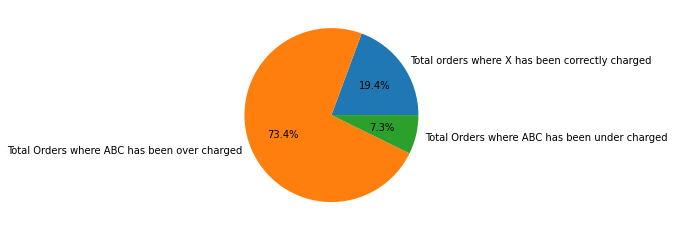

In [ ]:
# plot a Pie Chart for Registration Price column with label Car column
plt.pie(df5["Count"], labels = df5[" "], autopct='%1.1f%%')
plt.show()

**Further Studies:**

  Type of shipment cannot be verified with given datasets.
